# Datan luonti kaavojen testausta varten

Tässä notebookissa luodaan dataa, joka lopulta tallennetaan csv-muotoon. Manuaalisesti on vaihdettava viimeisessä solussa csv-tiedoston haluttu nimi.Tässä ei ole käytettyu `np.random.seed()`- funktiota, joten jokaisella kerralla syntyy uusia satunnaisarvoja. 

**Tässä versiossa on muutoksia aiempiin generaatiovalintoihin**

### Tarvittavat tiedot

1. sukupuoli
2. ikä
3. pituus
4. painoindeksi
5. paino
6. peruskulutus (perusaineenvaihdunta * 1.25)
7. rasvaprosentti
8. rasvaton massa
9. lihasmassa
10. lihasvoima: kyykyt, vatsat, punnerrukset
11. kestävyys: kävelytesti (Vo2max)

In [1]:
# tarvittavat kirjastot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Naiset/ Miehet: 1.sukupuoli, 2. ikä, 3. pituus, 4. painoindeksi, 5. paino

**Datatype:**   
sukupuoli - object  
ikä - int    
pituus - float  
painoindeksi - float  https://ourworldindata.org/obesity  
paino - float  

**RIIPPUVUUDET**:
* Sukupuoli:
* Ikä:
* Pituus: sukupuoli
* Painoindeksi:
* Paino: pituus, painoindeksi

| Painoindeksi (BMI, kg/m²) | Painon luokitus     |
|---------------------------|---------------------|
| < 18,5                    | alipaino            |
| 18,5–24,9                 | normaalipaino       |
| 25,0–29,9                 | ylipaino            |
| 30,0–34,9                 | lihavuus            |
| 35,0–39,9                 | vaikea lihavuus     |

(*laskentakaavat.xlsx : Viitearvoja*)

In [2]:
# määritellään haluttu datan määrä 
n = 20

# Sukupuolen generointi
sukupuoli = np.array(['nainen']*  n)

# Iän generointi 
ikä = np.random.randint(18, 65, n)

# Pituuden generointi (cm), eri sukupuolille eri jakaumat
pituus = np.random.normal(164.7, 7.08, n)   

# Painon generointi (kg), käytetään BMI (body mass index) ja pituus
bmi = np.random.normal(28,6, n) # valittu mielivaltaisesti

bmi = np.clip(bmi, 18,40) #rajataan arvot tietylle välille
paino = bmi * (pituus / 100) ** 2


#luodaan dataframen sarakkeet ja lisätään luodut arrayt niihin
data_naiset = pd.DataFrame({
    'Sukupuoli': sukupuoli,
    'Ikä' : ikä,
    'Pituus (cm)': pituus,
    'Paino (kg)': paino,
    'BMI': bmi})


# Pyöristetään pituus ja paino
data_naiset['Pituus (cm)'] = data_naiset['Pituus (cm)'].round(1)
data_naiset['Paino (kg)'] = data_naiset['Paino (kg)'].round(1)
data_naiset['BMI'] = data_naiset['BMI'].round(1)

data_naiset.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI
0,nainen,61,164.1,62.5,23.2
1,nainen,50,161.3,80.5,30.9
2,nainen,39,162.1,64.2,24.4
3,nainen,59,150.7,60.9,26.8
4,nainen,32,170.1,59.7,20.6


In [5]:
# määritelläään haluttu datan määrä 


n = 20

# Sukupuolen generointi
sukupuoli = np.array(['mies']* n)

# Iän generointi 
ikä = np.random.randint(18, 65, n)

# Pituuden generointi (cm), eri sukupuolille eri jakaumat
pituus = np.random.normal(178.4, 7.59, n)  # ka, keskihajonta, lukumäärä

# Painon generointi (kg), käytetään BMI (body mass index) ja pituus
bmi = np.random.normal(28,6, n) # valittu mielivaltaisesti
bmi = np.clip(bmi, 18,40)  # rajataan arvot halutulle välille
paino = bmi * (pituus / 100) ** 2

data_miehet = pd.DataFrame({
    'Sukupuoli': sukupuoli,
    'Ikä' : ikä,
    'Pituus (cm)': pituus,
    'Paino (kg)': paino,
    'BMI': bmi})


# Pyöristetään pituus ja paino
data_miehet['Pituus (cm)'] = data_miehet['Pituus (cm)'].round(1)
data_miehet['Paino (kg)'] = data_miehet['Paino (kg)'].round(1)
data_miehet['BMI'] = data_miehet['BMI'].round(1)


display(data_miehet.head())

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI
0,mies,58,173.5,83.3,27.7
1,mies,23,176.8,115.9,37.1
2,mies,25,190.6,108.3,29.8
3,mies,43,182.6,69.0,20.7
4,mies,45,186.2,96.6,27.8


### Tutkitaan luotujen arvojen jakautumista naisilla ja miehillä

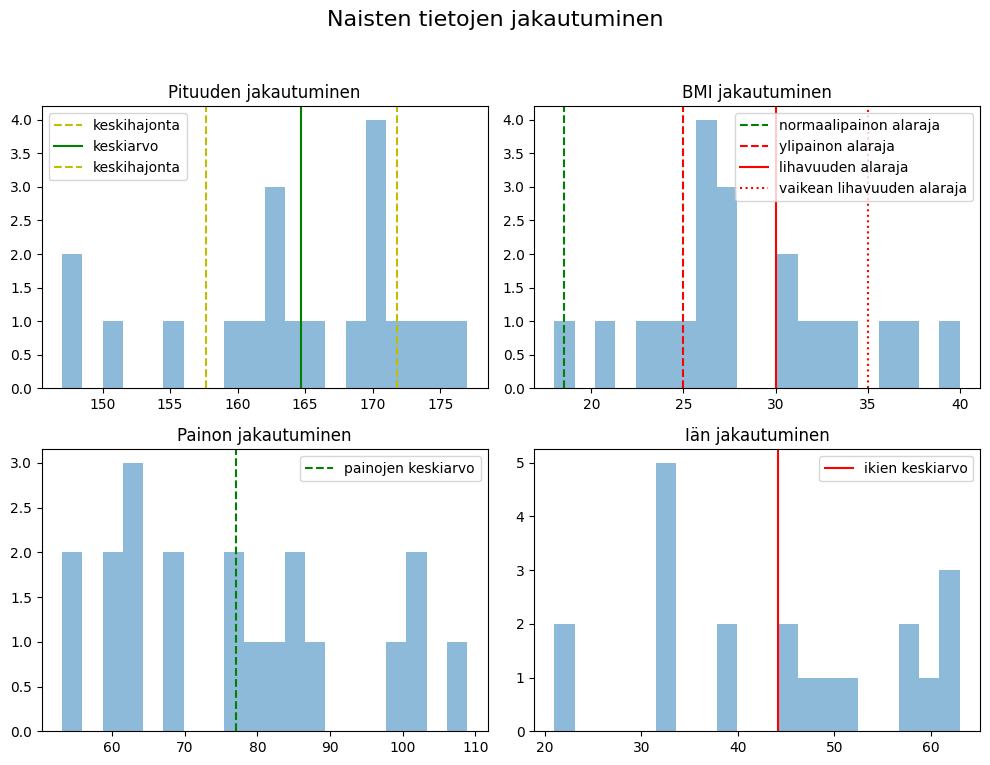

In [3]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2,2,figsize=(10, 8))

# pituuden jakautuminen
axis[0, 0].hist(data_naiset['Pituus (cm)'], bins = 20, alpha=0.5) 
axis[0, 0].set_title("Pituuden jakautuminen") 

# Lisätään pystysuorat viivat merkiksi arvoille
axis[0, 0].axvline(x=(164.7-7.07), color='y', linestyle='--', label='keskihajonta')
axis[0, 0].axvline(x=(164.7), color='g', linestyle='-', label='keskiarvo')
axis[0,0].axvline(x=(164.7+7.07), color='y', linestyle='--', label='keskihajonta')
axis[0, 0].legend()  # Näytetään selite

# For Cosine Function 
axis[0, 1].hist(data_naiset['BMI'], bins = 20, alpha=0.5) 
axis[0, 1].set_title("BMI jakautuminen") 

# Lisätään pystysuorat viivat merkiksi arvoille
axis[0, 1].axvline(x=18.5, color='g', linestyle='--', label='normaalipainon alaraja')
axis[0, 1].axvline(x=25, color='r', linestyle='--', label='ylipainon alaraja')
axis[0,1].axvline(x=30, color='r', linestyle='-', label='lihavuuden alaraja')
axis[0,1].axvline(x=35, color='r', linestyle=':', label='vaikean lihavuuden alaraja')
axis[0, 1].legend()  # Näytetään selite

# For Tangent Function 
axis[1, 0].hist(data_naiset['Paino (kg)'], bins = 20, alpha=0.5)  
axis[1, 0].set_title("Painon jakautuminen") 
axis[1,0].axvline(x=data_naiset['Paino (kg)'].mean(), color='g', linestyle='--', label='painojen keskiarvo')
axis[1,0].legend()  # Näytetään selite

# For Tanh Function 
axis[1, 1].hist(data_naiset['Ikä'], bins = 20, alpha=0.5)  
axis[1, 1].set_title("Iän jakautuminen") 
axis[1,1].axvline(x=data_naiset['Ikä'].mean(), color='r', linestyle='-', label='ikien keskiarvo')
axis[1,1].legend()


# Lisätään pääotsikko
figure.suptitle('Naisten tietojen jakautuminen', fontsize=16)

# Parannetaan alikuvioiden asettelua
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

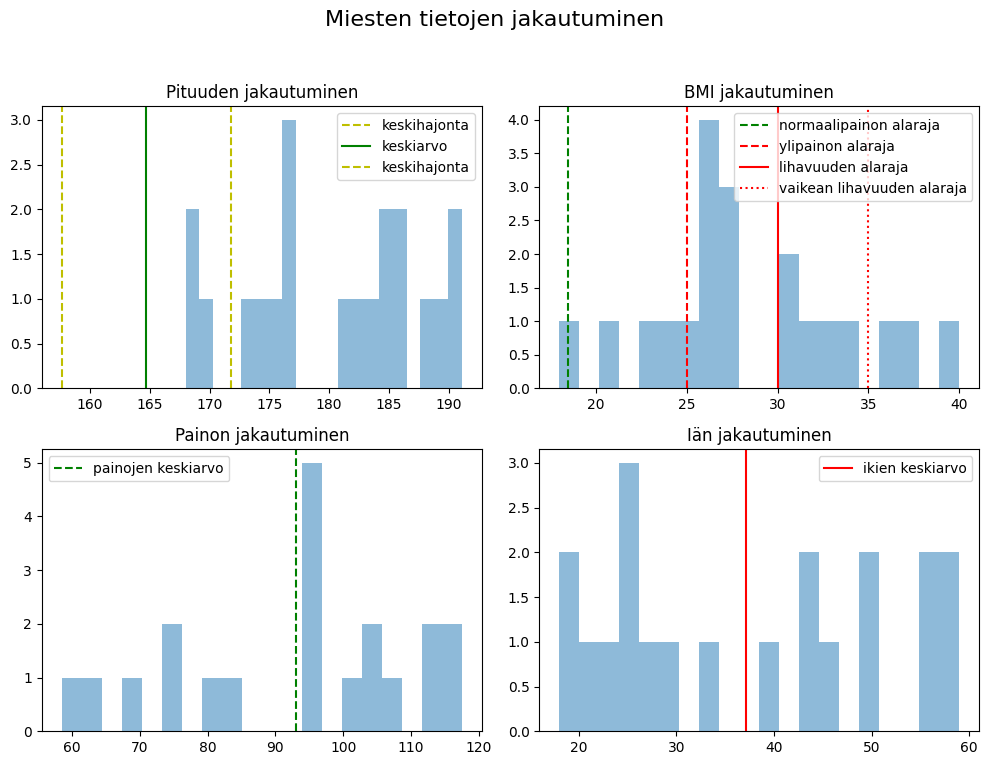

In [6]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2,2,figsize=(10, 8))

# pituuden jakautuminen
axis[0, 0].hist(data_miehet['Pituus (cm)'], bins = 20, alpha=0.5) 
axis[0, 0].set_title("Pituuden jakautuminen") 

# Lisätään pystysuorat viivat merkiksi arvoille
axis[0, 0].axvline(x=(164.7-7.07), color='y', linestyle='--', label='keskihajonta')
axis[0, 0].axvline(x=(164.7), color='g', linestyle='-', label='keskiarvo')
axis[0,0].axvline(x=(164.7+7.07), color='y', linestyle='--', label='keskihajonta')
axis[0, 0].legend()  # Näytetään selite

# For Cosine Function 
axis[0, 1].hist(data_naiset['BMI'], bins = 20, alpha=0.5) 
axis[0, 1].set_title("BMI jakautuminen") 

# Lisätään pystysuorat viivat merkiksi arvoille
axis[0, 1].axvline(x=18.5, color='g', linestyle='--', label='normaalipainon alaraja')
axis[0, 1].axvline(x=25, color='r', linestyle='--', label='ylipainon alaraja')
axis[0,1].axvline(x=30, color='r', linestyle='-', label='lihavuuden alaraja')
axis[0,1].axvline(x=35, color='r', linestyle=':', label='vaikean lihavuuden alaraja')
axis[0, 1].legend()  # Näytetään selite

# For Tangent Function 
axis[1, 0].hist(data_miehet['Paino (kg)'], bins = 20, alpha=0.5)  
axis[1, 0].set_title("Painon jakautuminen") 
axis[1,0].axvline(x=data_miehet['Paino (kg)'].mean(), color='g', linestyle='--', label='painojen keskiarvo')
axis[1,0].legend()  # Näytetään selite

# For Tanh Function 
axis[1, 1].hist(data_miehet['Ikä'], bins = 20, alpha=0.5)  
axis[1, 1].set_title("Iän jakautuminen") 
axis[1,1].axvline(x=data_miehet['Ikä'].mean(), color='r', linestyle='-', label='ikien keskiarvo')
axis[1,1].legend()

# Lisätään pääotsikko
figure.suptitle('Miesten tietojen jakautuminen', fontsize=16)

# Parannetaan alikuvioiden asettelua
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Huomioita iän jakautumisesta: painot arvottuu välin ala- ja yläpäihin, pitäisikö muodostaa jollakin jakaumalla?

In [7]:
# yhdistetään data
data = pd.concat([data_naiset, data_miehet], ignore_index=True)
data.describe()

,Ikä,Pituus (cm),Paino (kg),BMI
count,40.000000,40.000000,40.000000,40.000000
mean,40.650000,172.417500,85.025000,28.557500
std,13.982682,11.481019,18.988131,5.607316
min,18.000000,147.000000,53.100000,18.000000
25%,29.250000,164.850000,69.225000,25.975000
50%,41.000000,172.750000,83.650000,27.750000
75%,52.000000,181.625000,100.475000,31.575000
max,63.000000,191.100000,117.500000,40.000000


### 6. Peruskulutus vuorokaudessa
**Lasketaan vuorokausikulutuksen arvo alkutietojen perusteella ja lisätään se dataan**  
Kaavana käytetään Harris-Benedict versiota. Saatu perusaineenvaihdunta kerrotaan 1.25 arvolla, jotta saadaan vuorokauden peruskulutus (arkiaskaareet yms.)

**RIIPPUVUUDET**:
* ikä
* paino
* pituus

In [8]:
def vrk_perusaineenvaihdunta(sukupuoli, paino, pituus, ikä):
    if sukupuoli == 'mies':
        pav = 88.362 + (13.397 * paino) + (4.799 * pituus) - (5.677 * ikä)
        vrk_pav = pav + (pav * 0.1) + (pav * 0.15) 
    else:
        pav = 447.593 + (9.247 * paino) + (3.098 * pituus) - (4.330 * ikä)
        vrk_pav = pav + (pav * 0.1) + (pav * 0.15) 
    
    return vrk_pav

In [9]:
# Lisää lihasmassa sarake
data['Vuorokausiaineenvaihdunta'] = data.apply(lambda row: vrk_perusaineenvaihdunta(row['Sukupuoli'], row['Paino (kg)'], row['Pituus (cm)'], row['Ikä']), axis=1)
data['Vuorokausiaineenvaihdunta']=data['Vuorokausiaineenvaihdunta'].astype(int)
data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta
0,nainen,61,164.1,62.5,23.2,1587
1,nainen,50,161.3,80.5,30.9,1843
2,nainen,39,162.1,64.2,24.4,1718
3,nainen,59,150.7,60.9,26.8,1527
4,nainen,32,170.1,59.7,20.6,1735


### 7. rasvaprosentti

**Datatype:** float


`1.20 * bmi + 0.23 * ikä - 10.8 * sukupuoli - 5.4`   
if sukupuoli == 'mies' &#x27A1; 1
if sukupuoli == 'nainen' &#x27A1; 0  
https://fi.wikipedia.org/wiki/Rasvaprosentti  

Kohinaa lisätessä valitsin mielivaltaisesti normaalijakauman keskiarvolla 0 ja keskihajonnalla 4.  
Rajasin arvot eri väleille sukupuolen perusteella.
* Naiset 14-40
* Miehet 8-30


**RIIPPUVUUS**: 
* sukupuoli
* ikä
* painoindeksi

*In adults the prediction formula was: BF% = 1.20 x BMI + 0.23 x age - 10.8 x sex - 5.4 (R2 0.79, SEE = 4.1% BF%).* https://pubmed.ncbi.nlm.nih.gov/2043597/ 

 

In [10]:
# Rasvaprosentin laskeminen
data['Rasvaprosentti'] = 1.20 * data['BMI'] + 0.23 * data['Ikä'] - 10.8 * (data['Sukupuoli'] == 'mies') - 5.4

# Lisätään kohina rasvaprosenttiin
n = len(data)
kohina = np.random.normal(0, 4, size=n)  # Keskihajonnaksi valittu 4
data['Rasvaprosentti'] = round(data['Rasvaprosentti'] + kohina,1)

# Rajataan rasvaprosentin arvot sukupuolen perusteella
data['Rasvaprosentti'] = np.where(
    data['Sukupuoli'] == 'mies',
    np.clip(data['Rasvaprosentti'], 8, 30),
    np.clip(data['Rasvaprosentti'], 14, 40)
)

data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti
0,nainen,61,164.1,62.5,23.2,1587,26.3
1,nainen,50,161.3,80.5,30.9,1843,40.0
2,nainen,39,162.1,64.2,24.4,1718,37.8
3,nainen,59,150.7,60.9,26.8,1527,40.0
4,nainen,32,170.1,59.7,20.6,1735,25.7


In [11]:
# Rasvaprosentin laskeminen
data['Rasvamassa (kg)'] = round(data['Rasvaprosentti'] / 100 * data['Paino (kg)'],1)
data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg)
0,nainen,61,164.1,62.5,23.2,1587,26.3,16.4
1,nainen,50,161.3,80.5,30.9,1843,40.0,32.2
2,nainen,39,162.1,64.2,24.4,1718,37.8,24.3
3,nainen,59,150.7,60.9,26.8,1527,40.0,24.4
4,nainen,32,170.1,59.7,20.6,1735,25.7,15.3


### 8. rasvaton massa (kg)

**Datatype:** float

rasvaton massa = paino * (1 - rasvaprosentti/100)

**RIIPPUVUUS**:
* rasvaprosentti

(Rasvattoman massan laskulle on oma kaavansa: https://en.wikipedia.org/wiki/Lean_body_mass)

In [12]:
# Lasketaan rasvaton massa
data['Rasvaton massa (kg)'] = round(data['Paino (kg)'] * (1 - data['Rasvaprosentti'] / 100),1)

data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg)
0,nainen,61,164.1,62.5,23.2,1587,26.3,16.4,46.1
1,nainen,50,161.3,80.5,30.9,1843,40.0,32.2,48.3
2,nainen,39,162.1,64.2,24.4,1718,37.8,24.3,39.9
3,nainen,59,150.7,60.9,26.8,1527,40.0,24.4,36.5
4,nainen,32,170.1,59.7,20.6,1735,25.7,15.3,44.4


### 9. lihasmassa (kg)

**Datatype:** float

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7012897/ -> lihasmassan laskentakaavat:

Miehet: SM = 0.23xW + 0.15xH – 0.058xA – 0.0005 x A² – 13.2

Naiset: SM = 0.19xW + 0.11xH – 0.095xA + 0.0003x A²  – 9.0

Kaavaa käytettäessä olen lisännyt mielivaltaisesti kohinaa normaalijakauman standardipoikkeamalla 3. 

**RIIPPUVUUS**:
* paino
* pituus
* ikä

* Ilman kaavaa laskettaessa: rasvaton massa (-> lihasmassa tietty osuus lihasmassasta), ikä

In [13]:
# funktio lihasmassan lisäämiseen
def lihasmassa(sukupuoli, paino, pituus, ika):
    if sukupuoli.lower() == 'mies':
        result = 0.23*paino + 0.15*pituus - 0.058*ika - 0.0005*ika**2 - 13.2
    else:
        result = 0.19*paino + 0.11*pituus - 0.095*ika + 0.0003*ika**2 - 9.0
    
    # Lisätään hajonta (satunnainen poikkeama)
    hajonta = np.random.normal(scale=3.0)  #hajonta valittu standardipoikkeamalla 3.0
    result += hajonta
    
    return round(result, 1)

In [14]:
# Lisää lihasmassa sarake
data['Lihasmassa (kg)'] = data.apply(lambda row: lihasmassa(row['Sukupuoli'], row['Paino (kg)'], row['Pituus (cm)'], row['Ikä']), axis=1)

data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg)
0,nainen,61,164.1,62.5,23.2,1587,26.3,16.4,46.1,14.6
1,nainen,50,161.3,80.5,30.9,1843,40.0,32.2,48.3,21.5
2,nainen,39,162.1,64.2,24.4,1718,37.8,24.3,39.9,15.9
3,nainen,59,150.7,60.9,26.8,1527,40.0,24.4,36.5,15.5
4,nainen,32,170.1,59.7,20.6,1735,25.7,15.3,44.4,18.3


#### Verrataan lihasmassan osuutta rasvattomaan massaan 

In [15]:
data['Lihasmassan osuus rasvattomasta'] = round(data['Lihasmassa (kg)'] / data['Rasvaton massa (kg)'],2)
data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta
0,nainen,61,164.1,62.5,23.2,1587,26.3,16.4,46.1,14.6,0.32
1,nainen,50,161.3,80.5,30.9,1843,40.0,32.2,48.3,21.5,0.45
2,nainen,39,162.1,64.2,24.4,1718,37.8,24.3,39.9,15.9,0.40
3,nainen,59,150.7,60.9,26.8,1527,40.0,24.4,36.5,15.5,0.42
4,nainen,32,170.1,59.7,20.6,1735,25.7,15.3,44.4,18.3,0.41


### Kävelytestin viitearvon laskeminen ja siitä tulosten generointi

**Step 1. viitearvojen laskeminen pituuden, painon ja iän perusteella**  
**Step 2. tulosten generointi lisämällä random arvo väliltä esim. -200 - 200 viitearvoon**  

**Kuuden minuutin kävelytestin viitearvotaulukosta löytyy seuraavat kaavat:**

Miehet: (7,57 x pituus cm) - (5,02 x ikä v) - (1,76 x paino kg) - 309 m

Naiste: (2,11 x pituus cm) - (5,78 x ikä v) - (2,29 x paino kg) - 667 m  
([Lähde myös täällä](https://www.atsjournals.org/doi/10.1164/ajrccm.158.5.9710086))
https://www.atsjournals.org/doi/10.1164/ajrccm.158.5.9710086?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%20%200pubmed

````
Men:
6MWD = (7.57 × heightcm) − (5.02 × age) − (1.76 × weightkg) − 309 m.Alternate equation using BMI*:
6MWD = 1,140 m − (5.61 × BMI) − (6.94 × age)
When using either equation, subtract 153 m for the LLN
Women:
6MWD = (2.11 × heightcm) − (2.29 × weightkg) − (5.78 × age) + 667 m.Alternate equation using BMI:
6MWD = 1,017 m − (6.24 × BMI) − (5.83 × age)
When using either equation, subtract 139 m for the LLN
````


In [16]:
def walk_test_reference_value(sukupuoli: str, pituus: float, ikä: float, paino: float):
    """
    Kävelytestin viitearvojen laskeminen
    """
    if sukupuoli.lower() == 'mies':
        value = (7.57*pituus) - (5.02*ikä) - (1.76*paino) - 309
    else: 
        value = (2.11*pituus) - (5.78*ikä) - (2.29*paino) + 667
    return round(value)

In [17]:
data['6min viitearvo'] = data.apply(lambda row: walk_test_reference_value(row['Sukupuoli'], row['Pituus (cm)'],row['Ikä'],row['Paino (kg)']), axis=1)

data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo
0,nainen,61,164.1,62.5,23.2,1587,26.3,16.4,46.1,14.6,0.32,518
1,nainen,50,161.3,80.5,30.9,1843,40.0,32.2,48.3,21.5,0.45,534
2,nainen,39,162.1,64.2,24.4,1718,37.8,24.3,39.9,15.9,0.40,637
3,nainen,59,150.7,60.9,26.8,1527,40.0,24.4,36.5,15.5,0.42,504
4,nainen,32,170.1,59.7,20.6,1735,25.7,15.3,44.4,18.3,0.41,704


In [18]:
# generoidaan kävelytestin tulos viitearvosta
def walk_test_tulos(viitearvo, bmi, age):
    vaikutus = np.random.uniform(-170,170) #valittu random lisäys väliltä -170....170
    tulos = viitearvo + vaikutus
    return round(tulos)

In [19]:
# lisätään funktion tulos jokaiselle riville
data['6min tulos'] = data.apply(lambda row: walk_test_tulos(row['6min viitearvo'], row['BMI'], row['Ikä']), axis=1)

data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos
0,nainen,61,164.1,62.5,23.2,1587,26.3,16.4,46.1,14.6,0.32,518,654
1,nainen,50,161.3,80.5,30.9,1843,40.0,32.2,48.3,21.5,0.45,534,595
2,nainen,39,162.1,64.2,24.4,1718,37.8,24.3,39.9,15.9,0.40,637,669
3,nainen,59,150.7,60.9,26.8,1527,40.0,24.4,36.5,15.5,0.42,504,596
4,nainen,32,170.1,59.7,20.6,1735,25.7,15.3,44.4,18.3,0.41,704,806


### Kuvataan generoitujen tulosten jakautuminen suhteessa viitearvoihin

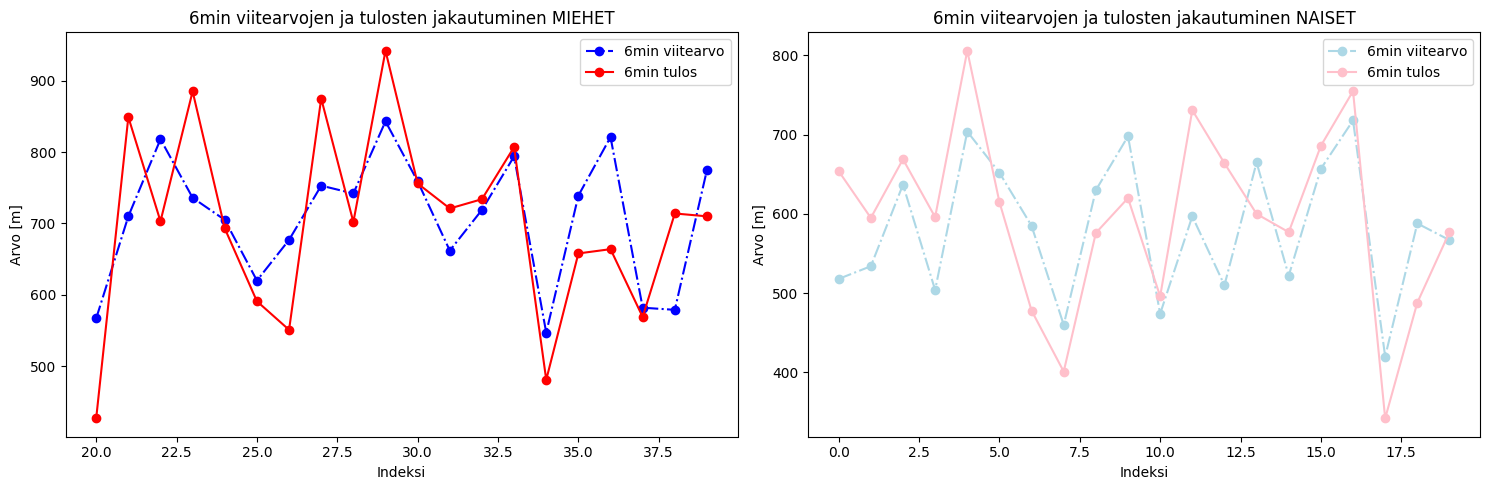

In [20]:
#erotetaan kahdeksi dataframeksi
data_mies = data[data['Sukupuoli']=='mies']
data_nainen = data[data['Sukupuoli']== 'nainen']

fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(data_mies.index, data_mies['6min viitearvo'], marker='o', linestyle='-.', color='b', label='6min viitearvo')
axes[0].plot(data_mies.index, data_mies['6min tulos'], marker='o', linestyle='-', color='r', label='6min tulos')
axes[0].set_title('6min viitearvojen ja tulosten jakautuminen MIEHET')
axes[0].set_xlabel('Indeksi')
axes[0].set_ylabel('Arvo [m]')
axes[0].legend(loc='best')

axes[1].plot(data_nainen.index, data_nainen['6min viitearvo'], marker='o', linestyle='-.', color='lightblue', label='6min viitearvo')
axes[1].plot(data_nainen.index, data_nainen['6min tulos'], marker='o', linestyle='-', color='pink', label='6min tulos')
axes[1].set_title('6min viitearvojen ja tulosten jakautuminen NAISET')
axes[1].set_xlabel('Indeksi')
axes[1].set_ylabel('Arvo [m]')
axes[1].legend(loc='best')

# Näytetään kuvaaja
plt.tight_layout()
plt.show()

## Generoidaan syke arvoja (tarvitaan miesten vo2max kaavassa)

Hyödynnetään tietoa maksimisykkeen tasosta : 220 - ikä. Arvotaan rasitustasoksi 6 minuutin kävelytestin lopussa 0.6-0.9 maksimisykkeestä. Lisätään tukisarakkeeksi tieto intensiteettitasosta (loppusyke suhteessa maksimisykkeeseen).

In [21]:
# Generate end heart rates
def syke_generaatio(ikä, bmi):
    max_taso = 220 - ikä  # Maximum heart rate
    intensiteetti = np.random.uniform(0.5,0.7)  #muutettu, aiemmin (0.6 , 0.9)
    return int(max_taso * intensiteetti)
    

data['syke testin lopussa'] = data.apply(lambda row: syke_generaatio(row['Ikä'], row['BMI']), axis=1)

# Display the new columns
data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa
0,nainen,61,164.1,62.5,23.2,1587,26.3,16.4,46.1,14.6,0.32,518,654,97
1,nainen,50,161.3,80.5,30.9,1843,40.0,32.2,48.3,21.5,0.45,534,595,105
2,nainen,39,162.1,64.2,24.4,1718,37.8,24.3,39.9,15.9,0.40,637,669,110
3,nainen,59,150.7,60.9,26.8,1527,40.0,24.4,36.5,15.5,0.42,504,596,81
4,nainen,32,170.1,59.7,20.6,1735,25.7,15.3,44.4,18.3,0.41,704,806,129


In [22]:
def testi_syke_maksimista(syke, ikä):
    max_syke = 220-ikä
    suhde = syke/max_syke
    return round(suhde, 2)

In [23]:
data['testisyke/max syke'] = data.apply(lambda row: testi_syke_maksimista(row['syke testin lopussa'], row['Ikä']),  axis=1)
data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke
0,nainen,61,164.1,62.5,23.2,1587,26.3,16.4,46.1,14.6,0.32,518,654,97,0.61
1,nainen,50,161.3,80.5,30.9,1843,40.0,32.2,48.3,21.5,0.45,534,595,105,0.62
2,nainen,39,162.1,64.2,24.4,1718,37.8,24.3,39.9,15.9,0.40,637,669,110,0.61
3,nainen,59,150.7,60.9,26.8,1527,40.0,24.4,36.5,15.5,0.42,504,596,81,0.50
4,nainen,32,170.1,59.7,20.6,1735,25.7,15.3,44.4,18.3,0.41,704,806,129,0.69


## Lasketaan Vo2max arvot - Maksmimaalinen hapenottokyky ml/kg/min

**Datatype:** int

**UKK:n 6 minuutin kävelytestin mukaan arvioitu Vo2max (Mänttäri et al.2018)**

Naiset: Vo2max= 22.506-0.271*(paino)+0.051*(kävelymatka)-0.065*(ikä)

Miehet: Vo2max= 110.546+0.063*(kävelymatka)-0.250*(ikä)-0.486*(BMI)-0.420*(pituus)-0.109*(syke)


**RIIPPUVUUS**:
*  paino

*  kävelymatka

*  ikä

*  syke (miehillä)

*In healthy subjects, the 6-min walk distance (6MWD) ranges from 400 to 700 m, the main predictor variables being gender, age and height*  
https://www.sciencedirect.com/science/article/pii/S0954611106000060


In [24]:
def vo2max_value(sukupuoli, ikä, pituus, paino, bmi, kävelymatka, syke): 
    if sukupuoli == 'mies':
        value = 110.546+ 0.063*kävelymatka - 0.250*ikä - 0.468*bmi - 0.420*pituus - 0.109*syke
    else:
        value = 22.506- 0.271*paino + 0.051*kävelymatka - 0.065*ikä
    return int(round(value))

In [25]:
data['vo2max'] = data.apply(lambda row: vo2max_value(row['Sukupuoli'],row['Ikä'], row['Pituus (cm)'],row['Paino (kg)'],row['BMI'],row['6min tulos'],row['syke testin lopussa']), axis=1)

data

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke,vo2max
0,nainen,61,164.1,62.5,23.2,1587,26.3,16.4,46.1,14.6,0.32,518,654,97,0.61,35
1,nainen,50,161.3,80.5,30.9,1843,40.0,32.2,48.3,21.5,0.45,534,595,105,0.62,28
2,nainen,39,162.1,64.2,24.4,1718,37.8,24.3,39.9,15.9,0.40,637,669,110,0.61,37
3,nainen,59,150.7,60.9,26.8,1527,40.0,24.4,36.5,15.5,0.42,504,596,81,0.50,33
4,nainen,32,170.1,59.7,20.6,1735,25.7,15.3,44.4,18.3,0.41,704,806,129,0.69,45
5,nainen,22,147.6,87.1,40.0,2018,40.0,34.8,52.3,21.6,0.41,652,615,105,0.53,29
6,nainen,46,170.7,77.1,26.4,1862,36.5,28.1,49.0,19.1,0.39,585,478,91,0.52,23
7,nainen,63,165.1,83.4,30.6,1821,40.0,33.4,50.0,20.7,0.41,460,401,86,0.55,16
8,nainen,39,147.0,53.1,24.6,1531,35.5,18.9,34.2,8.2,0.24,630,576,107,0.59,35
9,nainen,21,163.2,83.9,31.5,2047,40.0,33.6,50.3,24.3,0.48,698,620,118,0.59,30


## Lisätään kuntotason mukaan maksimaalisesta hapenottokyvystä (tarvitaan tätä tietoa ehkä lihasvoiman generoinnissa)


Asteikko näkyy kuvana alla. Datataulukkoon arvot muutetaan numeerisiksi seuraavalla tavalla:

|Arvo| Sanallinen kuvaus|
|---|:---:|
|1| Heikko|  
|2| Huono|
|3| Välttävä|
|4| Keskimääräinen
|5| Hyvä|
|6| Erittäin hyvä|
|7| Erinomainen|



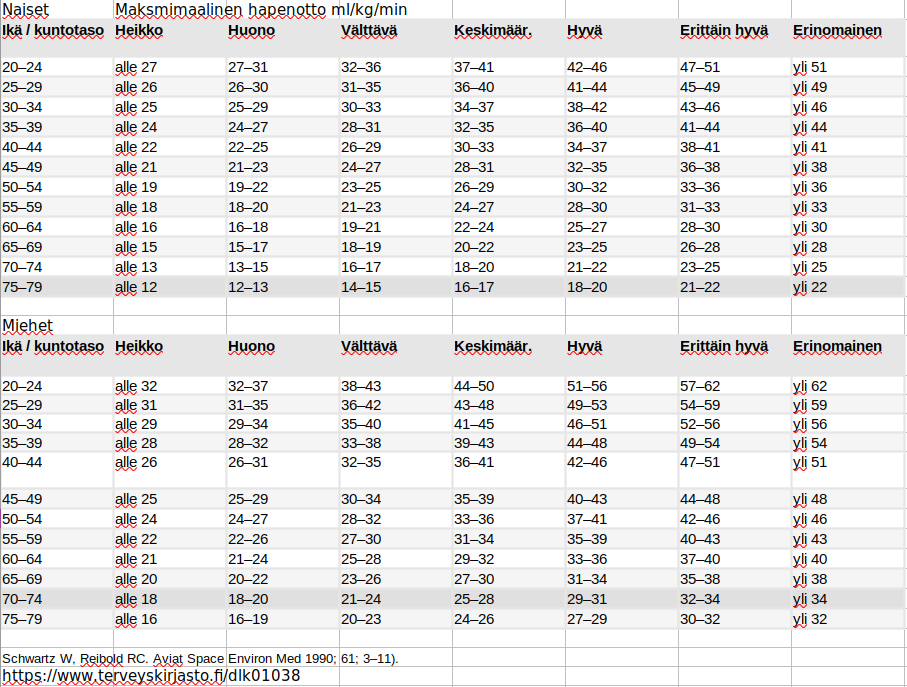

In [26]:
from IPython.display import Image, display

# Näytetään kuva
display(Image(filename='./images/kestavyys_viitearvot.png'))

In [27]:
#funktio kuntotason lisäämiseen

def get_kuntotaso(sex, age, vo2max):
    if sex == 'mies':
        if 18 <= age <= 24:      # changed from 20 to 18
            thresholds = [32, 37, 43, 50, 56, 62]
        elif 25 <= age <= 29:
            thresholds = [31, 35, 42, 48, 53, 59]
        elif 30 <= age <= 34:
            thresholds = [29, 34, 40, 45, 51, 56]
        elif 35 <= age <= 39:
            thresholds = [28, 32, 38, 43, 48, 54]
        elif 40 <= age <= 44:
            thresholds = [26, 31, 35, 41, 46, 51]
        elif 45 <= age <= 49:
            thresholds = [25, 29, 34, 39, 43, 48]
        elif 50 <= age <= 54:
            thresholds = [24, 27, 32, 36, 41, 46]
        elif 55 <= age <= 59:
            thresholds = [22, 26, 30, 34, 39, 43]
        elif 60 <= age <= 64:
            thresholds = [21, 24, 28, 32, 36, 40]
        elif 65 <= age <= 69:
            thresholds = [20, 22, 26, 30, 34, 38]
        elif 70 <= age <= 74:
            thresholds = [18, 20, 24, 28, 31, 34]
        elif 75 <= age <= 79:
            thresholds = [16, 19, 23, 26, 29, 32]
        else:
            return None  # Age out of range
    
    else:
        if 18 <= age <= 24:    # changed from 20 to 18
            thresholds = [27, 31, 36, 41, 46, 51]
        elif 25 <= age <= 29:
            thresholds = [26, 30, 35, 40, 44, 49]
        elif 30 <= age <= 34:
            thresholds = [25, 29, 33, 37, 42, 46]
        elif 35 <= age <= 39:
            thresholds = [24, 27, 31, 35, 40, 44]
        elif 40 <= age <= 44:
            thresholds = [22, 25, 29, 33, 37, 41]
        elif 45 <= age <= 49:
            thresholds = [21, 23, 27, 31, 35, 38]
        elif 50 <= age <= 54:
            thresholds = [19, 22, 25, 29, 32, 36]
        elif 55 <= age <= 59:
            thresholds = [18, 20, 23, 27, 30, 33]
        elif 60 <= age <= 64:
            thresholds = [16, 18, 21, 24, 27, 30]
        elif 65 <= age <= 69:
            thresholds = [15, 17, 19, 22, 25, 28]
        elif 70 <= age <= 74:
            thresholds = [13, 15, 17, 20, 22, 25]
        elif 75 <= age <= 79:
            thresholds = [12, 13, 15, 17, 20, 22]
        else:
            return None  # Age out of range

    for i, threshold in enumerate(thresholds):
        if vo2max < threshold:
            return i + 1  # Adding 1 because kuntotaso starts from 1, not 0
    return  7  # If vo2max is higher than all thresholds
    

In [28]:
data['Kuntotaso vo2max (1-7)'] = data.apply(lambda row: get_kuntotaso(row['Sukupuoli'], row['Ikä'], row['vo2max']), axis=1)

data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke,vo2max,Kuntotaso vo2max (1-7)
0,nainen,61,164.1,62.5,23.2,1587,26.3,16.4,46.1,14.6,0.32,518,654,97,0.61,35,7
1,nainen,50,161.3,80.5,30.9,1843,40.0,32.2,48.3,21.5,0.45,534,595,105,0.62,28,4
2,nainen,39,162.1,64.2,24.4,1718,37.8,24.3,39.9,15.9,0.40,637,669,110,0.61,37,5
3,nainen,59,150.7,60.9,26.8,1527,40.0,24.4,36.5,15.5,0.42,504,596,81,0.50,33,7
4,nainen,32,170.1,59.7,20.6,1735,25.7,15.3,44.4,18.3,0.41,704,806,129,0.69,45,6


### Tarkastellaan kuntotasojen jakautumista

In [29]:
naiset = data[data['Sukupuoli']=='nainen']
kuntotaso_counts_naiset = naiset['Kuntotaso vo2max (1-7)'].value_counts().sort_index()

miehet = data[data['Sukupuoli']=='mies']
kuntotaso_counts_miehet = miehet['Kuntotaso vo2max (1-7)'].value_counts().sort_index()

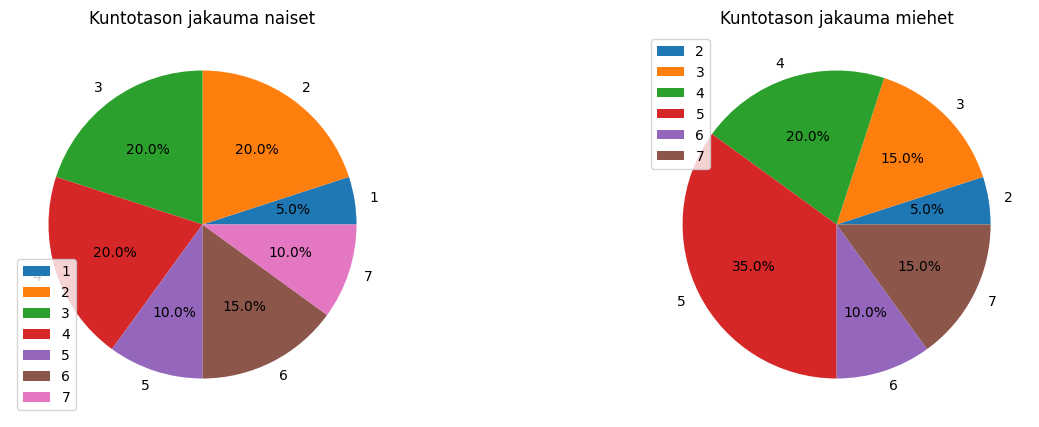

In [30]:
# Piirakkakaavion piirtäminen
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].pie(kuntotaso_counts_naiset,labels=kuntotaso_counts_naiset.index, autopct='%1.1f%%')
axes[0].set_title('Kuntotason jakauma naiset')
axes[0].legend()

axes[1].pie(kuntotaso_counts_miehet,labels=kuntotaso_counts_miehet.index, autopct='%1.1f%%')
axes[1].set_title('Kuntotason jakauma miehet')
axes[1].legend()

plt.show()

### Lihasvoima: maksimivoima jalkaprässistä

Luodaan riippuvuus kehonpainoon sekä lihasmassaan. 

In [35]:
# Oletetaan, että meillä on lihasmassan ja jalkaprässivoiman välinen peruskorrelaatio
# Tämä on yksinkertainen lineaarinen malli, jossa jalkaprässin voima riippuu lihasmassasta.

def generate_leg_press_max_force(muscle_mass_kg):
    # Voit määrittää keskimääräisen suhteen lihasmassan ja jalkaprässin maksimivoiman välillä.
    # Esimerkkinä: jokainen lihaskilo tuottaa 30-50 kg voimaa
    base_force_per_kg = 10  # keskimääräinen voima per lihaskilo
    variability = 0 #np.random.uniform(-2, 2)  # Lisää satunnaista vaihtelua
    
    # Maksimivoima-arvo lasketaan
    max_force = muscle_mass_kg * (base_force_per_kg + variability)
    return round(max_force, 2)

# Testataan datalla, jossa lihasmassa on 29.7 kg
lihasmassa = 29.7
max_force = generate_leg_press_max_force(lihasmassa)
print(f"Lihasmassa: {lihasmassa} kg -> Maksimivoima jalkaprässissä: {max_force} kg")


Lihasmassa: 29.7 kg -> Maksimivoima jalkaprässissä: 297.0 kg


In [ ]:
data['Kuntotaso vo2max (1-7)'] = data.apply(lambda row: get_kuntotaso(row['Lihasmassa (kg)'], axis=1))

### Lihasvoiman arvot: toistot minuutin lihaskuntotesteissä

Testit ovat toistokyykyt, istumaannousut sekä etunojapunnerrukset. Viitearvotaulukot on kuvina alla.
Kokeilen ensin generoida toistotuloksia ilman riippuvuuksia. 


![toistokyykyt](./images/toistokyykyt.png)
![istumaannousut](./images/istumaannousut.png)
![etunojapunnerrukset](./images/etunojapunnerrukset.png)


In [50]:
data['kyykyt/60s'] = np.random.randint(3, 45, size=len(data))
    
data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke,vo2max,Kuntotaso vo2max (1-7),kyykyt/60s
0,nainen,41,164.7,75.8,28.0,1851,40.0,30.3,45.5,18.3,0.40,604,727,160,0.89,36,5,29
1,nainen,50,162.0,48.7,18.6,1479,26.4,12.9,35.8,15.2,0.42,608,737,137,0.81,44,7,15
2,nainen,41,161.4,96.1,36.9,2073,40.0,38.4,57.7,25.1,0.44,551,461,128,0.72,17,1,35
3,nainen,28,156.8,74.7,30.4,1878,39.6,29.6,45.1,15.4,0.34,665,804,157,0.82,41,5,36
4,nainen,25,170.8,52.5,18.0,1692,34.7,18.2,34.3,18.1,0.53,763,794,170,0.87,47,6,43


In [51]:
import pandas as pd
import numpy as np

def get_kuntotaso(sex, age, kyykyt):
    if sex == 'mies':
        if 18 <= age <= 24:
            thresholds = [27, 35, 43, 51]
        elif 25 <= age <= 29:
            thresholds = [25, 33, 41, 49]
        elif 30 <= age <= 34:
            thresholds = [23, 31, 39, 47]
        elif 35 <= age <= 39:
            thresholds = [21, 29, 37, 45]
        elif 40 <= age <= 44:
            thresholds = [19, 27, 35, 43]
        elif 45 <= age <= 49:
            thresholds = [17, 25, 33, 41]
        elif 50 <= age <= 54:
            thresholds = [15, 23, 31, 39]
        elif 55 <= age <= 59:
            thresholds = [13, 21, 29, 37]
        elif 60 <= age <= 65:
            thresholds = [11, 19, 27, 35]
        else:
            return None  # Age out of range
    
    elif sex == 'nainen':
        if 18 <= age <= 24:
            thresholds = [14, 26, 34, 42]
        elif 25 <= age <= 29:
            thresholds = [12, 24, 32, 40]
        elif 30 <= age <= 34:
            thresholds = [10, 22, 30, 38]
        elif 35 <= age <= 39:
            thresholds = [8, 20, 28, 36]
        elif 40 <= age <= 44:
            thresholds = [6, 18, 26, 34]
        elif 45 <= age <= 49:
            thresholds = [4, 16, 24, 32]
        elif 50 <= age <= 54:
            thresholds = [2, 14, 22, 30]
        elif 55 <= age <= 59:
            thresholds = [1, 12, 20, 28]
        elif 60 <= age <= 65:
            thresholds = [1, 12, 18, 26]
        else:
            return None  # Age out of range

    for i, threshold in enumerate(thresholds):
        if kyykyt <= threshold:
            return i + 1  # Adding 1 because kuntotaso starts from 1, not 0
    return 5  # If kyykyt is higher than all thresholds



In [52]:
# Apply the classification function to create the 'kuntotaso kyykyt' column
data['kuntotaso kyykyt (1-5)'] = data.apply(lambda row: get_kuntotaso(row['Sukupuoli'], row['Ikä'], row['kyykyt/60s']), axis=1)

# Display the DataFrame to verify the results
data.head()


,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke,vo2max,Kuntotaso vo2max (1-7),kyykyt/60s,kuntotaso kyykyt (1-5)
0,nainen,41,164.7,75.8,28.0,1851,40.0,30.3,45.5,18.3,0.40,604,727,160,0.89,36,5,29,4
1,nainen,50,162.0,48.7,18.6,1479,26.4,12.9,35.8,15.2,0.42,608,737,137,0.81,44,7,15,3
2,nainen,41,161.4,96.1,36.9,2073,40.0,38.4,57.7,25.1,0.44,551,461,128,0.72,17,1,35,5
3,nainen,28,156.8,74.7,30.4,1878,39.6,29.6,45.1,15.4,0.34,665,804,157,0.82,41,5,36,4
4,nainen,25,170.8,52.5,18.0,1692,34.7,18.2,34.3,18.1,0.53,763,794,170,0.87,47,6,43,5


In [53]:
data

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke,vo2max,Kuntotaso vo2max (1-7),kyykyt/60s,kuntotaso kyykyt (1-5)
0,nainen,41,164.7,75.8,28.0,1851,40.0,30.3,45.5,18.3,0.40,604,727,160,0.89,36,5,29,4
1,nainen,50,162.0,48.7,18.6,1479,26.4,12.9,35.8,15.2,0.42,608,737,137,0.81,44,7,15,3
2,nainen,41,161.4,96.1,36.9,2073,40.0,38.4,57.7,25.1,0.44,551,461,128,0.72,17,1,35,5
3,nainen,28,156.8,74.7,30.4,1878,39.6,29.6,45.1,15.4,0.34,665,804,157,0.82,41,5,36,4
4,nainen,25,170.8,52.5,18.0,1692,34.7,18.2,34.3,18.1,0.53,763,794,170,0.87,47,6,43,5
5,nainen,53,171.5,78.1,26.5,1839,38.9,30.4,47.7,23.7,0.50,544,493,148,0.89,23,3,37,5
6,nainen,55,167.7,84.2,30.0,1884,40.0,33.7,50.5,23.4,0.46,510,581,101,0.61,26,4,3,2
7,nainen,57,151.3,71.1,31.0,1658,40.0,28.4,42.7,13.4,0.31,494,488,117,0.72,24,4,23,4
8,nainen,37,180.8,89.0,27.2,2088,37.1,33.0,56.0,22.1,0.39,631,590,115,0.63,26,2,8,1
9,nainen,52,165.7,82.5,30.0,1873,40.0,33.0,49.5,23.1,0.47,527,597,117,0.70,27,4,30,4


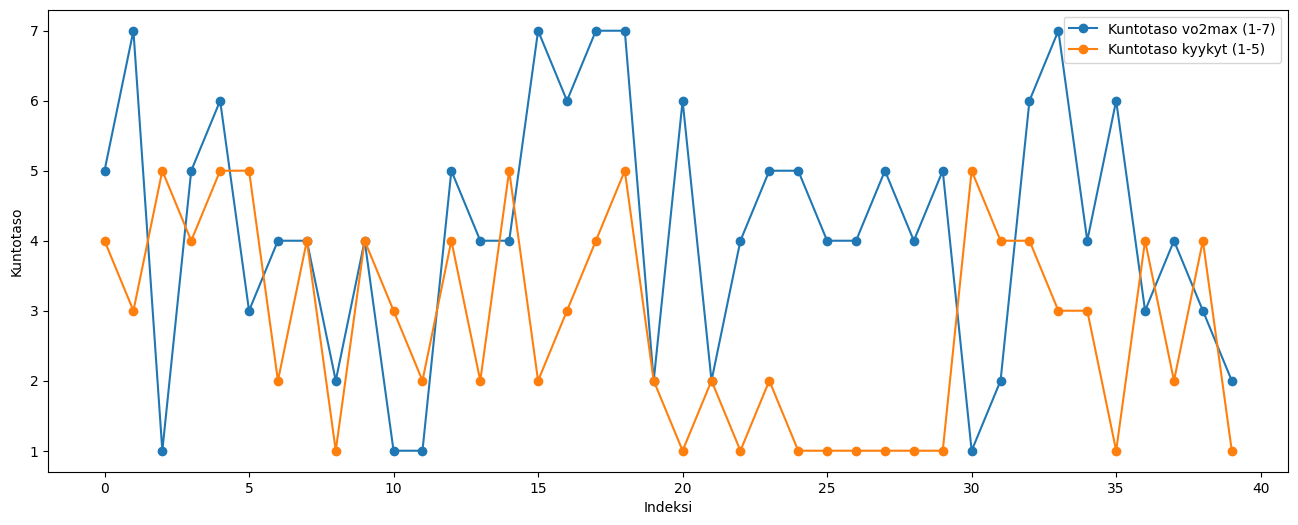

In [60]:
plt.figure(figsize=(16,6))
plt.plot(data['Kuntotaso vo2max (1-7)'], marker='o', label='Kuntotaso vo2max (1-7)')
plt.plot(data['kuntotaso kyykyt (1-5)'], marker='o', label='Kuntotaso kyykyt (1-5)')
plt.xlabel('Indeksi')
plt.ylabel('Kuntotaso')
plt.legend()



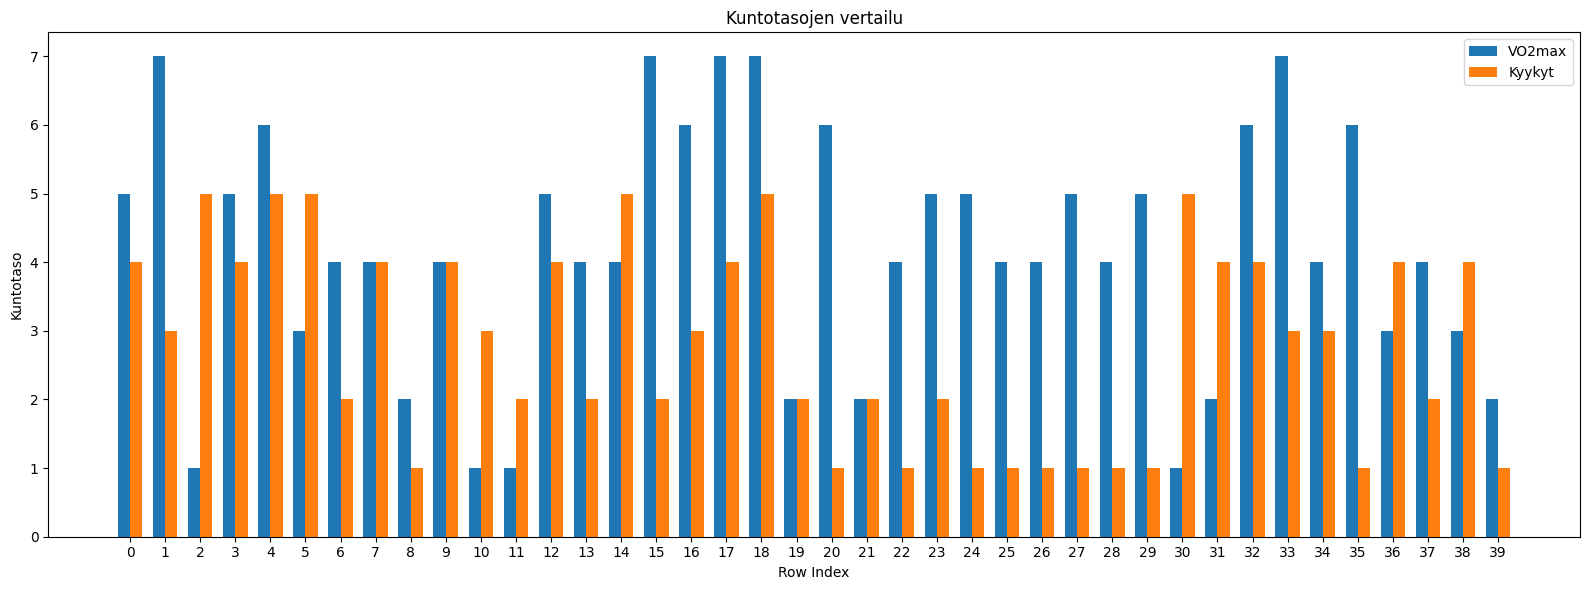

In [61]:
plt.figure(figsize=(16, 6))
bar_width = 0.35
index = range(len(data))
plt.bar(index, data['Kuntotaso vo2max (1-7)'], bar_width, label='VO2max')
plt.bar([i + bar_width for i in index], data['kuntotaso kyykyt (1-5)'], bar_width, label='Kyykyt')
plt.xlabel('Row Index')
plt.ylabel('Kuntotaso')
plt.title('Kuntotasojen vertailu')
plt.legend()
plt.xticks([i + bar_width/2 for i in index], index)
plt.tight_layout()
plt.show()

In [62]:
data

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke,vo2max,Kuntotaso vo2max (1-7),kyykyt/60s,kuntotaso kyykyt (1-5)
0,nainen,41,164.7,75.8,28.0,1851,40.0,30.3,45.5,18.3,0.40,604,727,160,0.89,36,5,29,4
1,nainen,50,162.0,48.7,18.6,1479,26.4,12.9,35.8,15.2,0.42,608,737,137,0.81,44,7,15,3
2,nainen,41,161.4,96.1,36.9,2073,40.0,38.4,57.7,25.1,0.44,551,461,128,0.72,17,1,35,5
3,nainen,28,156.8,74.7,30.4,1878,39.6,29.6,45.1,15.4,0.34,665,804,157,0.82,41,5,36,4
4,nainen,25,170.8,52.5,18.0,1692,34.7,18.2,34.3,18.1,0.53,763,794,170,0.87,47,6,43,5
5,nainen,53,171.5,78.1,26.5,1839,38.9,30.4,47.7,23.7,0.50,544,493,148,0.89,23,3,37,5
6,nainen,55,167.7,84.2,30.0,1884,40.0,33.7,50.5,23.4,0.46,510,581,101,0.61,26,4,3,2
7,nainen,57,151.3,71.1,31.0,1658,40.0,28.4,42.7,13.4,0.31,494,488,117,0.72,24,4,23,4
8,nainen,37,180.8,89.0,27.2,2088,37.1,33.0,56.0,22.1,0.39,631,590,115,0.63,26,2,8,1
9,nainen,52,165.7,82.5,30.0,1873,40.0,33.0,49.5,23.1,0.47,527,597,117,0.70,27,4,30,4


In [63]:
data.sort_values(by=['Sukupuoli', 'Ikä'], inplace=True)
data

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke,vo2max,Kuntotaso vo2max (1-7),kyykyt/60s,kuntotaso kyykyt (1-5)
22,mies,19,166.6,107.3,38.7,2771,30.0,32.2,75.1,38.6,0.51,668,634,136,0.68,43,4,19,1
37,mies,24,181.6,80.4,24.4,2375,24.2,19.5,60.9,27.3,0.45,804,691,139,0.71,45,4,28,2
27,mies,26,179.5,101.4,31.5,2700,30.0,30.4,71.0,40.2,0.57,741,844,150,0.77,51,5,15,1
36,mies,30,172.6,78.4,26.3,2245,13.4,10.5,67.9,28.7,0.42,709,565,170,0.89,35,3,41,4
24,mies,34,169.3,53.6,18.7,1782,8.0,4.3,49.3,20.9,0.42,708,566,115,0.62,45,5,16,1
35,mies,41,168.6,75.1,26.4,2088,24.6,18.5,56.6,25.4,0.45,629,695,133,0.74,46,6,10,1
34,mies,42,175.6,73.7,23.9,2099,23.9,17.6,56.1,29.4,0.52,680,596,148,0.83,37,4,33,3
23,mies,43,193.6,89.7,23.9,2468,21.9,19.6,70.1,39.5,0.56,783,775,113,0.64,44,5,23,2
32,mies,43,187.6,100.4,28.5,2612,23.7,23.8,76.6,30.3,0.40,719,863,114,0.64,50,6,36,4
20,mies,44,174.2,69.3,22.9,2003,17.9,12.4,56.9,21.3,0.37,667,729,127,0.72,48,6,12,1


# MÄÄRITÄ DATAN SISÄLTÄVÄN CSV-TIEDOSTON NIMI!!

In [64]:
uusi_nimi = '08-07-data'

In [65]:
data.to_csv(f'data/{uusi_nimi}.csv', index=False)

### Pieni testi sanakirjasta sarakkeen datana

In [51]:
a = {'sukupuoli' : ['nainen', 'nainen'],
     'ikä': [30, 40],
     
     'painot' :[{'eka': 50, 3: 49, 6: 48}, {'eka': 60, 3: 58, 6: 56}], 
     'kuntotaso' : [ 1, 2]
}

da = pd.DataFrame(data=a)
da

,sukupuoli,ikä,painot,kuntotaso
0,nainen,30,"{'eka': 50, 3: 49, 6: 48}",1
1,nainen,40,"{'eka': 60, 3: 58, 6: 56}",2


In [53]:
da.to_excel('excel-files/dict2.xlsx')